# Working with daily SalishSeaCast results from Skookum

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from dateutil.parser import parse
from cmocean import cm
from salishsea_tools import utilities

%matplotlib inline

## Load results

In [3]:
# Timerange (datetime objects)
daterange = [parse(t) for t in ['2015 Jan 1', '2015 Jan 10']]

# Results path
path = '/results2/SalishSea/nowcast-green.201806'

# Initialize storage arrays
date = np.empty(0, dtype='object')
SA = np.empty((0, 40))

# Iterate over number of days in daterange
bar = utilities.statusbar('Loading ...')
for day in bar(range(np.diff(daterange)[0].days)):
    
    # Make date and datestrings
    datestamp = daterange[0] + timedelta(days=day)
    datestr1 = datestamp.strftime('%d%b%y').lower()
    datestr2 = datestamp.strftime('%Y%m%d')
    
    # Make filename
    fn = f'SalishSea_1h_{datestr2}_{datestr2}_grid_T.nc'
    
    # Open netCDF
    with xr.open_dataset(os.path.join(path, datestr1, fn)) as T:
    
        # Slice, format, and concatenate results
        date = np.concatenate((date, T.time_counter.values.astype('datetime64[s]').astype(datetime)), axis=0)
        SA = np.concatenate((SA, T.vosaline[..., 500, 250].values), axis=0)

Loading ... 100% (9 of 9) |################################################|Time: 0:00:50


## Plot concatenated results

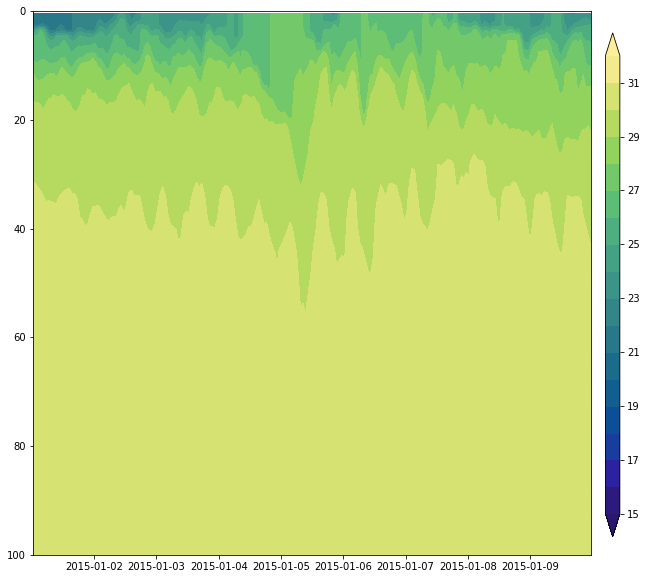

In [4]:
# Plot concatenated results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
c = ax.contourf(date, T.deptht, SA.T, levels=np.arange(15, 33), cmap=cm.haline, extend='both')
ax.set_ylim([100, 0])
fig.colorbar(c, cax=cax)